In [8]:
import axelrod as axl
import numpy as np

import opt_mo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import sqlalchemy as sa

In [9]:
##import seaborn as sns
from scipy import stats

In [10]:
import pandas as pd
from scipy import stats

In [11]:
def read_sql_data_frame(path):
    engine = sa.create_engine("sqlite:///%s" % path)
    connection = engine.connect()

    return pd.read_sql("experiments", connection)

font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [12]:
df = read_sql_data_frame('../data/without_gambler/main.db')

In [13]:
#df_with_g = opt_mo.tools.read_sql_data_frame('../data/with_gambler/main.db')

In [14]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,195.356021,0.480099,0.502505,0.508802,0.488233,0.507916,0.515518,0.499353,0.488913,0.255501,...,1.963351,0.044713,0.103631,0.044713,0.103631,0.044661,0.032924,0.044661,0.032924,1.492147
std,118.810902,0.285097,0.279084,0.307653,0.295131,0.282112,0.275211,0.285727,0.280182,0.408110,...,3.961590,0.204484,0.218418,0.204484,0.218418,0.206444,0.099245,0.206444,0.099245,5.973141
min,0.000000,0.001510,0.000426,0.001315,0.001682,0.000452,0.000210,0.000403,0.001457,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,95.250000,0.238499,0.252807,0.220597,0.226465,0.257962,0.276702,0.270177,0.236932,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,190.500000,0.479413,0.515978,0.533688,0.464321,0.509397,0.531545,0.494710,0.497235,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,285.750000,0.712003,0.741535,0.772155,0.753512,0.751597,0.734230,0.739260,0.736440,0.525522,...,2.000000,0.000000,0.090544,0.000000,0.090544,0.000000,0.000000,0.000000,0.000000,1.000000
max,434.000000,0.993368,0.996174,0.999550,0.998631,0.998260,0.999020,0.999129,0.998740,1.000000,...,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999771,1.000000,0.999771,117.000000


In [15]:
color = matplotlib.cm.viridis(0.3)

In [16]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,...,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,195.356021,0.480099,0.502505,0.508802,0.488233,0.507916,0.515518,0.499353,0.488913,0.255501,...,1.963351,0.044713,0.103631,0.044713,0.103631,0.044661,0.032924,0.044661,0.032924,1.492147
std,118.810902,0.285097,0.279084,0.307653,0.295131,0.282112,0.275211,0.285727,0.280182,0.408110,...,3.961590,0.204484,0.218418,0.204484,0.218418,0.206444,0.099245,0.206444,0.099245,5.973141
min,0.000000,0.001510,0.000426,0.001315,0.001682,0.000452,0.000210,0.000403,0.001457,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,95.250000,0.238499,0.252807,0.220597,0.226465,0.257962,0.276702,0.270177,0.236932,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,190.500000,0.479413,0.515978,0.533688,0.464321,0.509397,0.531545,0.494710,0.497235,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,285.750000,0.712003,0.741535,0.772155,0.753512,0.751597,0.734230,0.739260,0.736440,0.525522,...,2.000000,0.000000,0.090544,0.000000,0.090544,0.000000,0.000000,0.000000,0.000000,1.000000
max,434.000000,0.993368,0.996174,0.999550,0.998631,0.998260,0.999020,0.999129,0.998740,1.000000,...,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999771,1.000000,0.999771,117.000000


**Is ZD code**

In [17]:
vector = [0.8888888888888888, 0.5, 0.3333333333333333, 0.0]

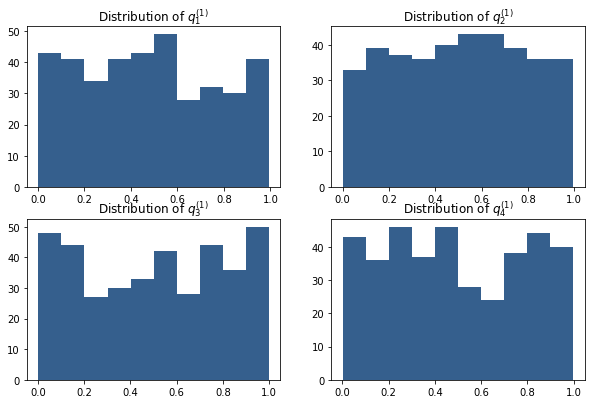

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    axes[index].hist(df['first_opponent_q_{}'.format(i + 1)], color=color)
    
    axes[index].set_title('Distribution of $q^{(1)}_%s$' % (i + 1))

plt.savefig('../img/first_opponent_probabilities.pdf')

In [19]:
df["SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)

**Number of best responses that are ZD**

In [22]:
df["is_ZD"] = df.apply(
    lambda row: opt_mo.tools.is_ZD(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)
df["SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)


/home/nightwing/rsc/Memory-size-in-the-prisoners-dilemma/src/opt_mo/tools.py:98: RuntimeWarning: invalid value encountered in double_scalars
  + T * tilde_vector[2]


In [23]:
sum(df["is_ZD"]), max(df["SSerror"]), min(df["SSerror"])

(0, 2.4705882352941178, 4.058768550141423e-07)

In [24]:
df["evol_is_ZD"] = df.apply(
    lambda row: opt_mo.tools.is_ZD(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)
df["evol_SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)


/home/nightwing/rsc/Memory-size-in-the-prisoners-dilemma/src/opt_mo/tools.py:98: RuntimeWarning: invalid value encountered in double_scalars
  + T * tilde_vector[2]


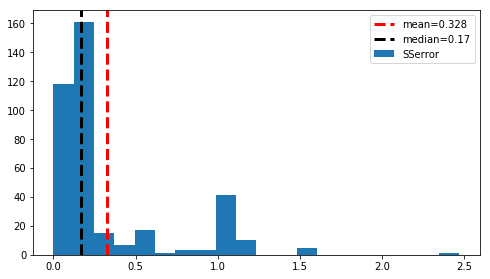

In [27]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.hist(df["SSerror"], bins=20,);
axes.axvline(
    np.mean(df["SSerror"]), color="red", linestyle="dashed", linewidth=3,
    label="mean=%s" % round(np.mean(df["SSerror"]), 3)
)
axes.set_xticks(np.linspace(0, 2.5, 6))

axes.axvline(
    np.median(df["SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(df["SSerror"]), 3),
)
axes.legend();

plt.savefig('../img/best_respones_sserror.pdf')

In [28]:
def describe(df, stats):
    d = df.describe(percentiles=[.05, .25, .30, .35, .5, .95])
    return d.append(df.reindex_axis(d.columns, 1).agg(stats))

In [32]:
sserror_table = pd.DataFrame(describe(df, ['median', 'skew', 'kurt'])['SSerror'])
with open("../tex/sserror_table.tex", "w") as f:
    f.write(sserror_table.to_latex())

/home/nightwing/anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


This analysis can be repeated for reactive strategies. It has been carried out but there were no interesting results.

**Best response Evolutionary memory one (Evo)**

In [ ]:
df["Evo SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)

In [ ]:
error_columns = ["SSerror", "evol_SSerror", "reactive_SSerror", "evol_reactive_SSerror"]

In [ ]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.hist(df["Evo SSerror"], bins=20, color=color);
axes.axvline(
    np.mean(df["Evo SSerror"]), color="red", linestyle="dashed", linewidth=3,
    label="mean=%s" % round(np.mean(df["Evo SSerror"]), 3)
)
axes.set_xticks(np.linspace(0, 1.5, 6))
axes.axvline(
    np.median(df["Evo SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(df["Evo SSerror"]), 3)
)
axes.legend();

plt.savefig('../img/evo_sserror.pdf')

In [ ]:
tol = 10 ** -2

In [ ]:
tolerances = [10 ** -i for i in range(2, 5)]
percentages = []
for tol in tolerances:
    results = [len([x for x in df[column].values if x < tol]) / len(df[column].values)
               for column in error_columns]
    results = [np.round(100 * x) for x in results]
    percentages.append(results)

In [ ]:
table = pd.DataFrame(percentages, columns=error_columns)
table['tolerance'] = tolerances

In [ ]:
table.set_index('tolerance')

In [ ]:
for i in range(9):
    index = (i % 4, int(i / 4))
    print(index)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i, column in enumerate(error_columns):
    index = (int(i / 2), i % 2)
    axes[index].hist(df[column], bins=20);
    axes[index].axvline(
        np.mean(df[column]), color="red", linestyle="dashed", linewidth=3, label="mean"
    )
    axes[index].set_xticks(np.linspace(0, 2.8, 6))
    axes[index].axvline(
        np.median(df[column]),
        color="black",
        linestyle="dashed",
        linewidth=3,
        label="median",
    )
    axes[index].legend()
    axes[index].set_title(column)

In [ ]:
evo_sserror_table

In [ ]:
F, p = stats.f_oneway(df['SSerror'], df['evol_SSerror'], df['reactive_SSerror'], df['evol_reactive_SSerror'])

In [ ]:
F, p

In [ ]:
data = [df[column] for column in error_columns[:2]]
plt.violinplot(data, showmedians=True);
plt.boxplot(data);

In [ ]:
fig = plt.figure()
data = [df[column] for column in error_columns[2:]]
plt.violinplot(data, showmedians=True);
plt.boxplot(data);

In [ ]:
data = [df[column] for column in error_columns[:2]]
plt.boxplot(data, showfliers=False);

In [ ]:
from scipy import stats

- Sample distributions are equal. **Fail to Reject $h_0$**

- Sample distributions are not equal. **Reject $h_0$** 

In [ ]:
def t_test(sample_one, sample_two, alpha=0.05):
    t, p = stats.ttest_ind(sample_one, sample_two)
    
    if p > alpha:
        print(r'Fail to reject $h_0$')
    else:
        print(r'Reject $h_0$')
        
    return p

In [ ]:
def test_ranksum(sample_one, sample_two, alpha=0.05):
    _, p = stats.ranksums(df['SSerror'], df['Evo SSerror'])
    
    if p > alpha:
        print(r'Fail to reject $h_0$')
    else:
        print(r'Reject $h_0$')
    return p

In [ ]:
p = t_test(df['SSerror'], df['Evo SSerror'])

In [ ]:
round(p, 10)

In [ ]:
p = test_ranksum(df['SSerror'], df['Evo SSerror'])

In [ ]:
round(p, 12)

**The actual behaviour**

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5), facecolor=bg_color)

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]],
        showmeans=True,
    )
    boxes = axes[index].boxplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]], showfliers=False
    )
    for bp in boxes['medians']:
        bp.set_color('red')
        bp.set_linewidth(2)
    for bp in boxes['caps']:
        bp.set_color(color)
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color(color)
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color(color)
        bp.set_linewidth(2)

    axes[index].set_title('Distribution of $p_%s$' % (i + 1), fontweight= 'medium', color=color)
    axes[index].set_ylabel('Probability of cooperating', fontweight= 'medium', color=color)
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best resp.", "best resp. with self interaction"])
    

    axes[index].spines['bottom'].set_color(color)
    axes[index].spines['top'].set_color(color)
    axes[index].spines['right'].set_color(color)
    axes[index].spines['left'].set_color(color)
    axes[index].xaxis.label.set_color(color)
    axes[index].tick_params(axis='x', colors=color)
    axes[index].tick_params(axis='y', colors=color)

fig.savefig("/Users/silversurfer/Documents/src/talks/talks/social dilemmas talk/static/result_self_interactions.pdf",
            transparent=True, facecolor=fig.get_facecolor())

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]],
        showmeans=True,
    )
    boxes = axes[index].boxplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]], showfliers=False
    )
    for bp in boxes['medians']:
        bp.set_color('red')
        bp.set_linewidth(2)
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(2)

    axes[index].set_title('Distribution of $p_%s$' % (i + 1), fontweight= 'medium')
    axes[index].set_ylabel('Probability of cooperating', fontweight= 'medium')
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best response", "evo"])
    
plt.savefig('../img/behaviour_violin_plots.pdf')

In [ ]:
means = []
for i in range(4):
    means.append((np.median(df['mem_one_p_{}'.format(i + 1)]),
                  np.median(df['evol_mem_one_p_{}'.format(i + 1)]),
                  round(test_ranksum(df['mem_one_p_{}'.format(i + 1)], df['evol_mem_one_p_{}'.format(i + 1)]), 3)))

In [ ]:
tests_table = pd.DataFrame(means, columns=['Memory one Median', 'Evo Median', 'p-values'])

In [ ]:
# ANOVA and removing outliers

In [ ]:
tests_table

In [ ]:
with open("../tex/medians_tests.tex", "w") as f:
    f.write(tests_table.to_latex().replace('\$', '$').replace('\_', '_'))

In [ ]:
distances = [
    [
        (row["evol_mem_one_p_{}".format(p + 1)] - row["mem_one_p_{}".format(p + 1)])
        for _, row in df.iterrows()
    ]
    for p in range(4)
]

In [ ]:
labels = ["$p_1$", "$p_2$", "$p_3$", "$p_4$"]

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)

    axes[index].hist(distance, color=color)
    axes[index].axvline(
        np.mean(distance), color="red", linestyle="dashed", linewidth=3,
        label="mean=%s" % round(np.mean(distance), 3)
    )
    axes[index].axvline(
        np.median(distance),
        color="black",
        linestyle="dashed",
        linewidth=3,
        label="median=%s" % round(np.median(distance), 3),
    )
    axes[index].set_title("Difference in %s" %labels[i])
    axes[index].legend()
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)
    
plt.savefig('../img/distances.pdf')

In [ ]:
skew = []
kurt = []
for distance in distances:
    skew.append(stats.skew(distance))
    kurt.append(stats.kurtosis(distance))
    


In [ ]:
skew_table = pd.DataFrame({'Skewness': skew, 'Kurtosis': kurt})
skew_table.index = [r'Difference in $p_1$', r'Difference in $p_2$', r'Difference in $p_3$',
                    r'Difference in $p_4$']

In [ ]:
skew_table 

In [ ]:
with open("../tex/skew_table.tex", "w") as f:
    f.write(skew_table.to_latex().replace('\$', '$').replace('\_', '_'))

**Regression**

In [ ]:
import seaborn as sbn
from sklearn.linear_model import LinearRegression

In [ ]:
correlation = df[df.columns[1:-16]].corr().round(2)

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation.replace(1, np.nan), square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

plt.savefig('../img/best_response_correlation.pdf')

In [ ]:
columns = list(df.columns[1:-20]) + list(df.columns[13:17])

In [ ]:
correlation = df[columns].corr().round(2)

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation.replace(1, np.nan), square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

plt.savefig('../img/evo_correlation.pdf')

In [ ]:
x = df['second_opponent_q_1']
y = df['mem_one_p_1']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.plot(x, y, 'o', color='black')
plt.plot(x, line, '--', color='red', linewidth=3);

plt.title(r'$p_1 = %.4f q^{(2)}_{1} + %.4f$' % (slope, intercept));

In [ ]:
x = df['first_opponent_q_4']
y = df['mem_one_p_2']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.plot(x, y, 'o', color='black')
plt.plot(x, line, '--', color='red', linewidth=3);

plt.title(r'$p_2 = %.4f q^{(1)}_{4} + %.4f$' % (slope, intercept));


In [ ]:
y = df['mem_one_p_4']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    x = df['first_opponent_q_{}'.format(i + 1)]


    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept

    axes[index].plot(x, y, 'o', color='black')
    axes[index].plot(x, line, '--', color='red', linewidth=3);

    axes[index].set_title(r'$p_3 = %.4f q^{(2)}_{1} + %.4f$' % (slope, intercept));

Arcooding to (Knight 2019), a method for testing for extortionate behaviour has been given. Though there is a n exact condition that must hold regarding a player transition probabilities. A more slacked definition is also given. Regarding the slack defitition the error of being a ZD strategy is defined.

In [ ]:
# ratios = []
# for p in range(4):
#     ratio = []
#     for _, row in df.iterrows():
#         try:
#             ratio.append(
#                 row["mem_one_p_{}".format(p + 1)]
#                 / row["evol_mem_one_p_{}".format(p + 1)]
#             )
#         except ZeroDivisionError:
#             pass
#     ratios.append(ratio)

In [ ]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
# for i, ratio in enumerate(ratios):
#     index = (int(i / 2), i % 2)

#     axes[index].hist(ratio)
#     axes[index].axvline(
#         1, color="red", linestyle="dashed", linewidth=2, label="ratio=1"
#     )
#     axes[index].set_title(labels[i])
#     axes[index].legend()